In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader as datard
import yfinance as yf

In [89]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

df = yf.download('SBIN.NS',start,end)
df = df.reset_index()
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-28,533.200012,537.500000,529.549988,532.450012,522.300415,12160734
1,2022-07-29,535.049988,537.000000,526.750000,528.349976,518.278503,11921058
2,2022-08-01,529.049988,535.000000,526.400024,533.750000,523.575623,8295631
3,2022-08-02,531.900024,544.900024,531.099976,542.099976,531.766418,16845027
4,2022-08-03,541.900024,546.400024,534.650024,540.849976,530.540222,24262125
5,2022-08-04,543.650024,544.000000,524.200012,533.250000,523.085144,18072293
6,2022-08-05,535.549988,542.900024,529.000000,531.049988,520.927063,21110734
7,2022-08-08,524.000000,524.000000,513.849976,520.400024,510.480103,32566317
8,2022-08-10,521.549988,523.500000,513.400024,514.700012,504.888733,16904151
9,2022-08-11,520.000000,526.000000,517.200012,524.750000,514.747192,13862195


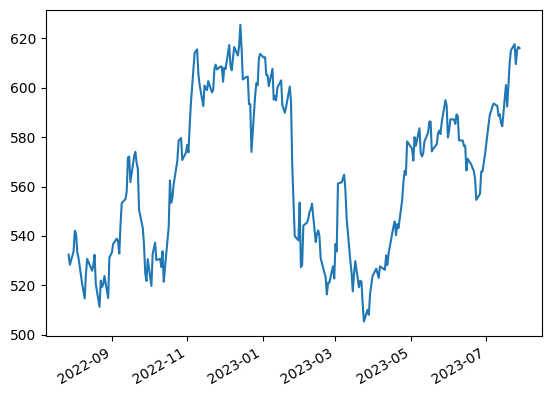

In [99]:

import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
plt.plot(df.Date, df.Close)
plt.gcf().autofmt_xdate()

In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head(10)

,Open,High,Low,Close,Volume
0,533.200012,537.500000,529.549988,532.450012,12160734
1,535.049988,537.000000,526.750000,528.349976,11921058
2,529.049988,535.000000,526.400024,533.750000,8295631
3,531.900024,544.900024,531.099976,542.099976,16845027
4,541.900024,546.400024,534.650024,540.849976,24262125
5,543.650024,544.000000,524.200012,533.250000,18072293
6,535.549988,542.900024,529.000000,531.049988,21110734
7,524.000000,524.000000,513.849976,520.400024,32566317
8,521.549988,523.500000,513.400024,514.700012,16904151
9,520.000000,526.000000,517.200012,524.750000,13862195


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,566.151620,571.156277,559.996963,565.481983,1.503060e+07
std,32.082217,31.588581,32.527783,31.838617,7.400766e+06
min,507.000000,511.750000,499.350006,505.350006,0.000000e+00
25%,534.824982,540.350006,527.450012,533.524994,1.001897e+07
50%,568.849976,574.400024,565.500000,569.700012,1.297276e+07
75%,594.775024,597.950012,588.200012,592.875000,1.771844e+07
max,625.549988,629.549988,617.500000,625.500000,4.565662e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    247 non-null    float64
 1   High    247 non-null    float64
 2   Low     247 non-null    float64
 3   Close   247 non-null    float64
 4   Volume  247 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 9.8 KB


# Moving Average

In [7]:
MA10 = df.Close.rolling(10).mean()
MA10

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
242    596.049994
243    598.554999
244    600.659998
245    603.250000
246    606.339996
Name: Close, Length: 247, dtype: float64

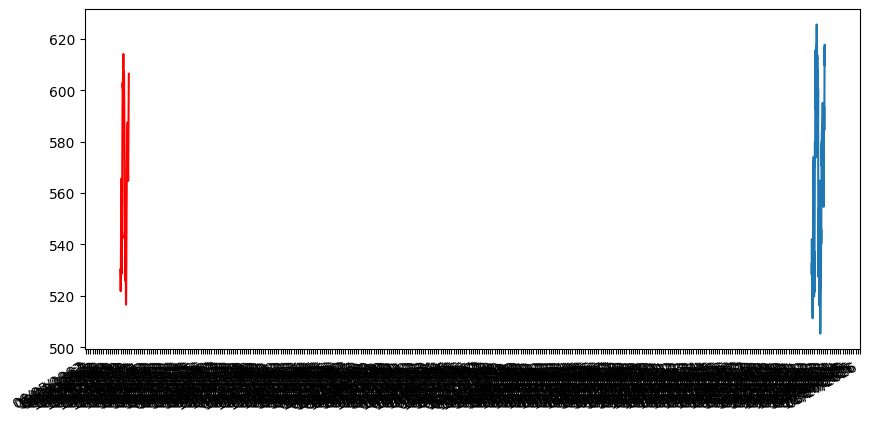

In [115]:
# import matplotlib.dates as pltdate 
plt.figure(figsize = (10,5))
plt.plot(df.Date, df.Close)
plt.plot(MA10, 'r')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
plt.gcf().autofmt_xdate()

In [9]:
MA20 = df.Close.rolling(20).mean()
MA50 = df.Close.rolling(50).mean()


Text(0.5, 1.0, 'Moving Avg. of closing stock 10days, 20days, 50days ')

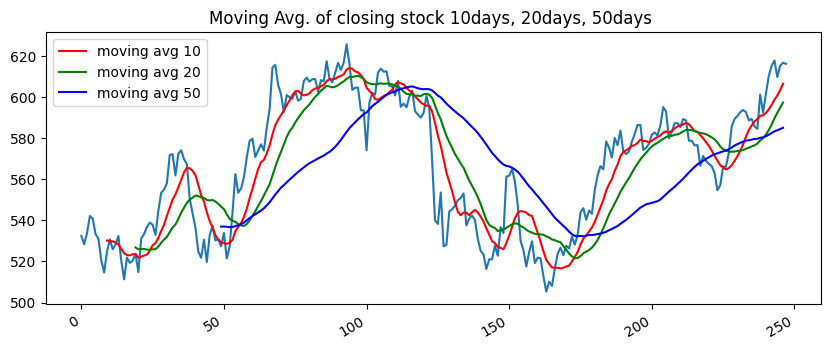

In [116]:
plt.figure(figsize = (10,4))
plt.plot(df.Close)
plt.plot(MA10,'r', label='moving avg 10')
plt.plot(MA20, 'g', label='moving avg 20')
plt.plot(MA50, 'b', label='moving avg 50')
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Moving Avg. of closing stock 10days, 20days, 50days ")

# Daily Returns

In [11]:
daily_return = df.Close.pct_change()
daily_return

0           NaN
1     -0.007700
2      0.010221
3      0.015644
4     -0.002306
         ...   
242    0.008278
243    0.004146
244   -0.013033
245    0.009104
246    0.002276
Name: Close, Length: 247, dtype: float64

<Axes: >

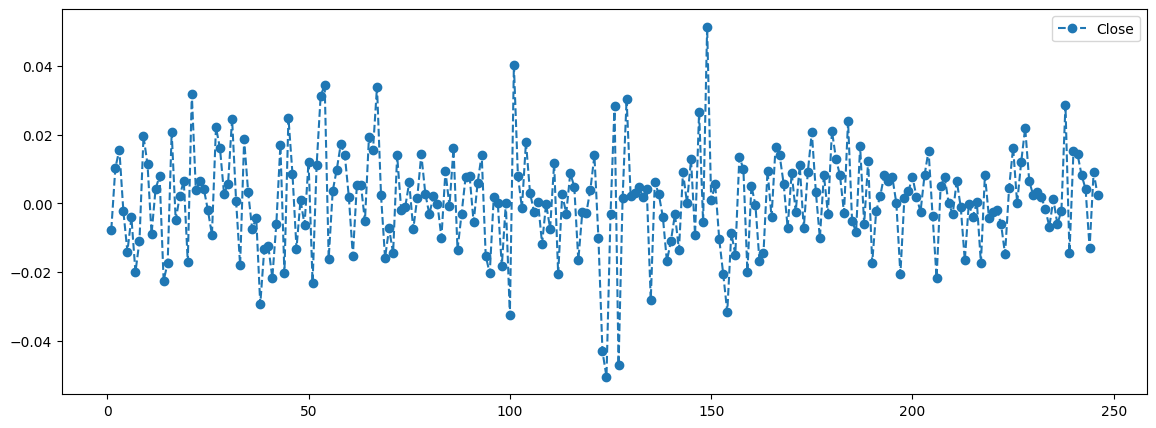

In [103]:
plt.figure(figsize = (14,5))
daily_return.plot(legend=True, linestyle='dashed', marker='o')

Text(0, 0.5, 'counts')

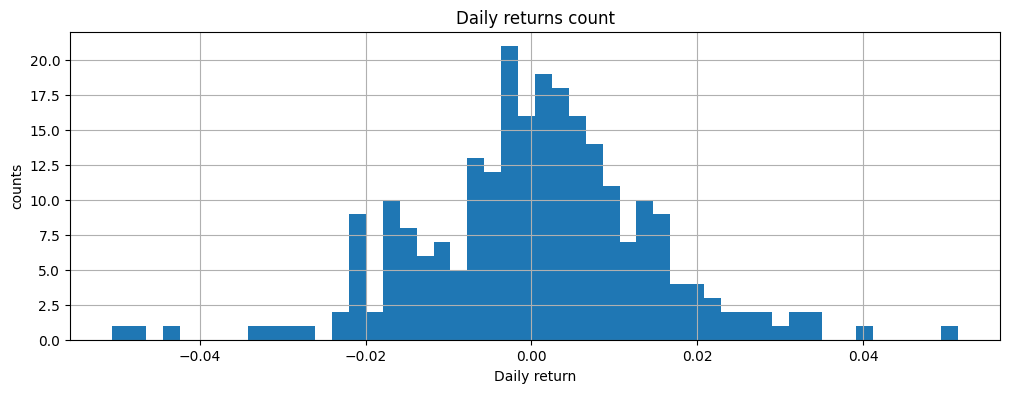

In [13]:
plt.figure(figsize=(12,4))
daily_return.hist(bins = 50)
plt.title("Daily returns count")
plt.xlabel("Daily return")
plt.ylabel("counts")

# Predict Closing Price

In [14]:
end_date = datetime.now()
start_date = datetime(end_date.year - 10, end_date.month, end_date.day)
df_new = yf.download('SBIN.NS',start_date,end_date)
df_new = df_new.reset_index()


[*********************100%***********************]  1 of 1 completed


In [15]:
df_close = df_new.drop(['Date', 'Adj Close', 'Open', 'High', 'Low', 'Volume'], axis = 1)

In [16]:
len(df_close)

2465

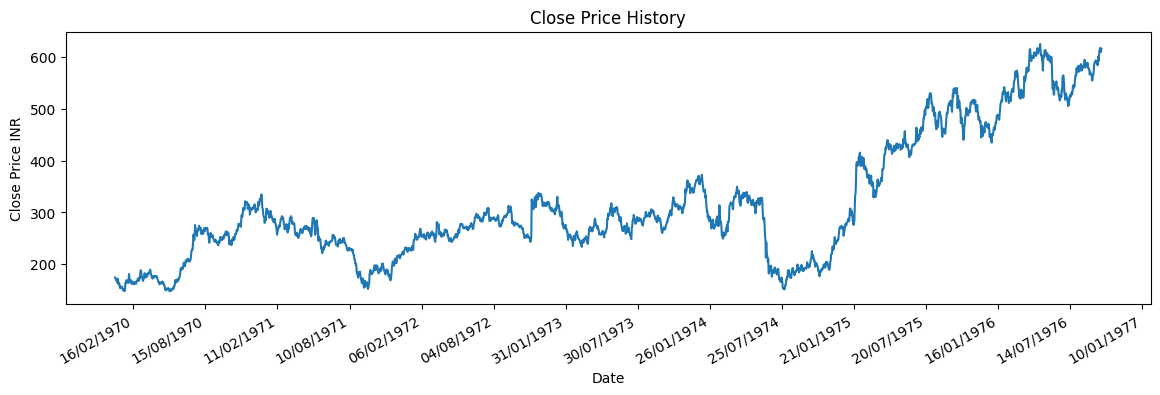

In [113]:
plt.figure(figsize=(14,4))
plt.title('Close Price History')
plt.plot(df_close['Close'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price INR', fontsize=10)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 180))
plt.gcf().autofmt_xdate()
plt.show()

In [18]:
train_data = pd.DataFrame(df_close['Close'])[0:int(len(df_close)*0.70)]
test_data = pd.DataFrame(df_close['Close'][int(len(df_close)*0.70):len(df_close)])

train_data.shape[0]

1725

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_data_array = scaler.fit_transform(train_data)
train_data_array.shape[0]

1725

In [20]:
X_train = []
y_train = []

for i in range(150,train_data_array.shape[0]):
  X_train.append(train_data_array[i-150: i])
  y_train.append(train_data_array[i, 0])


X_train, y_train = np.array(X_train), np.array(y_train)

**ML Model**

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.2))




model = Sequential()
model.add(LSTM(units = 70, activation ='relu', return_sequences = True))

model.add(Dropout(0.3))




model = Sequential()
model.add(LSTM(units = 90, activation ='relu', return_sequences = True))

model.add(Dropout(0.4))




model = Sequential()
model.add(LSTM(units = 100, activation ='relu'))

model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
50/50 [==============================] - 24s 129ms/step - loss: 0.0915
Epoch 2/25
50/50 [==============================] - 5s 91ms/step - loss: 0.0197
Epoch 3/25
50/50 [==============================] - 4s 90ms/step - loss: 0.0154
Epoch 4/25
50/50 [==============================] - 5s 92ms/step - loss: 0.0122
Epoch 5/25
50/50 [==============================] - 4s 89ms/step - loss: 0.0113
Epoch 6/25
50/50 [==============================] - 4s 86ms/step - loss: 0.0109
Epoch 7/25
50/50 [==============================] - 5s 92ms/step - loss: 0.0092
Epoch 8/25
50/50 [==============================] - 5s 91ms/step - loss: 0.0090
Epoch 9/25
50/50 [==============================] - 5s 91ms/step - loss: 0.0089
Epoch 10/25
50/50 [==============================] - 5s 92ms/step - loss: 0.0080
Epoch 11/25
50/50 [==============================] - 5s 93ms/step - loss: 0.0079
Epoch 12/25
50/50 [==============================] - 5s 93ms/step - loss: 0.0072
Epoch 13/25
50/50 [================

In [27]:
model.save("stock_analysis.h5")

c:\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
past_150days = train_data.tail(150)
# past_150days = past_150days.values.tolist()
# train_data = train_data.values.tolist()
# final_df = past_150days.append(test_data, ignore_index = True)
final_df = pd.concat([past_150days, test_data], ignore_index = True)
final_df

,Close
0,334.399994
1,333.750000
2,334.450012
3,339.299988
4,333.700012
...,...
885,615.099976
886,617.650024
887,609.599976
888,615.150024


In [106]:
final_data = scaler.fit_transform(final_df)


In [32]:
X_test = []
y_test = []
for i in range(150, final_data.shape[0]):
  X_test.append(final_data[i-150: i])
  y_test.append(final_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [33]:
y_pred = model.predict(X_test)

24/24 [==============================] - 26s 36ms/step


In [107]:
y_test_2d = [y_test]

In [37]:
true_y_pred = scaler.inverse_transform(y_pred)
true_y_test = scaler.inverse_transform(y_test_2d)

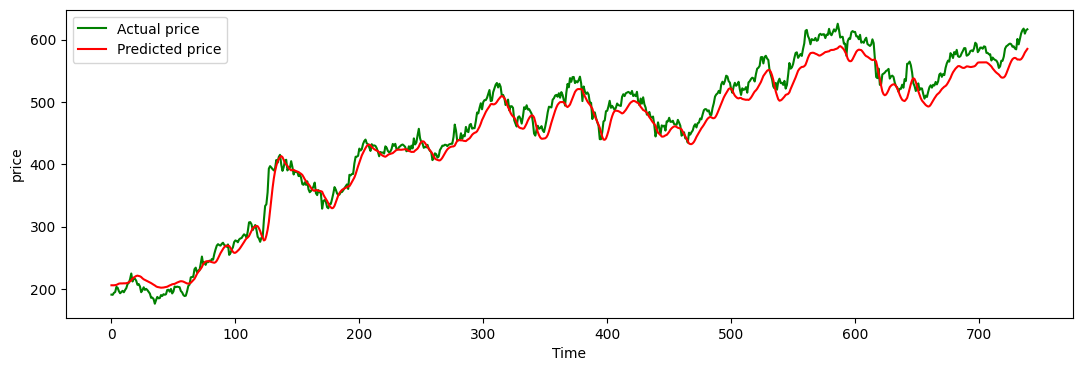

In [117]:
plt.figure(figsize = (13,4))
plt.plot(true_y_test, 'g', label = 'Actual price')
plt.plot(true_y_pred, 'r', label = 'Predicted price')
plt.xlabel("Time")
plt.ylabel("price")
plt.legend()